## Part 2: Clinical Application

### Contents
Fill out this notebook as part 2 of your final project submission.

**You will have to complete the Code (Load Metadata & Compute Resting Heart Rate) and Project Write-up sections.**  

- [Code](#Code) is where you will implement some parts of the **pulse rate algorithm** you created and tested in Part 1 and already includes the starter code.
  - [Imports](#Imports) - These are the imports needed for Part 2 of the final project. 
    - [glob](https://docs.python.org/3/library/glob.html)
    - [os](https://docs.python.org/3/library/os.html)
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
  - [Load the Dataset](#Load-the-dataset)  
  - [Load Metadata](#Load-Metadata)
  - [Compute Resting Heart Rate](#Compute-Resting-Heart-Rate)
  - [Plot Resting Heart Rate vs. Age Group](#Plot-Resting-Heart-Rate-vs.-Age-Group)
- [Project Write-up](#Project-Write-Up) to describe the clinical significance you observe from the **pulse rate algorithm** applied to this dataset, what ways/information that could improve your results, and if we validated a trend known in the science community. 

### Dataset (CAST)

The data from this project comes from the [Cardiac Arrythmia Suppression Trial (CAST)](https://physionet.org/content/crisdb/1.0.0/), which was sponsored by the National Heart, Lung, and Blood Institute (NHLBI). CAST collected 24 hours of heart rate data from ECGs from people who have had a myocardial infarction (MI) within the past two years.[1] This data has been smoothed and resampled to more closely resemble PPG-derived pulse rate data from a wrist wearable.[2]

1. **CAST RR Interval Sub-Study Database Citation** - Stein PK, Domitrovich PP, Kleiger RE, Schechtman KB, Rottman JN. Clinical and demographic determinants of heart rate variability in patients post myocardial infarction: insights from the Cardiac Arrhythmia Suppression Trial (CAST). Clin Cardiol 23(3):187-94; 2000 (Mar)
2. **Physionet Citation** - Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals (2003). Circulation. 101(23):e215-e220.

-----

### Code
#### Imports

When you implement the functions, you'll only need to you use the packages you've used in the classroom, like [Pandas](https://pandas.pydata.org/) and [Numpy](http://www.numpy.org/). These packages are imported for you here. We recommend you don't import other packages outside of the [Standard Library](https://docs.python.org/3/library/) , otherwise the grader might not be able to run your code.

In [1]:
import glob
import os

import numpy as np
import pandas as pd
import csv

#### Load the dataset

The dataset is stored as [.npz](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html) files. Each file contains roughly 24 hours of heart rate data in the 'hr' array sampled at 1Hz. The subject ID is the name of the file. You will use these files to compute resting heart rate.

Demographics metadata is stored in a file called 'metadata.csv'. This CSV has three columns, one for subject ID, age group, and sex. You will use this file to make the association between resting heart rate and age group for each gender.

Find the dataset in `../datasets/crisdb/`

In [2]:
hr_filenames = glob.glob('/data/crisdb/*.npz')

In [3]:
# Determine number of files
len(hr_filenames)

1537

In [4]:
# Explore the format of hr_filenames
for i in range(10):
    print(hr_filenames[i])

/data/crisdb/e190a.npz
/data/crisdb/e014b.npz
/data/crisdb/m169b.npz
/data/crisdb/e057a.npz
/data/crisdb/e093b.npz
/data/crisdb/m207b.npz
/data/crisdb/e247a.npz
/data/crisdb/e071b.npz
/data/crisdb/m165a.npz
/data/crisdb/e281b.npz


#### Load Metadata
Load the metadata file into a datastructure that allows for easy lookups from subject ID to age group and sex.

In [5]:
"""
# Load CSV with Python Standard Library
metadata_filename = '/data/crisdb/metadata.csv'

# Load the metadata file into this variable.
with open(metadata_filename, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    metadata = np.array(list(reader)).astype(str)
    
for i in range(5):
    print(metadata[i])
"""

"\n# Load CSV with Python Standard Library\nmetadata_filename = '/data/crisdb/metadata.csv'\n\n# Load the metadata file into this variable.\nwith open(metadata_filename, 'r') as f:\n    reader = csv.reader(f, delimiter=',')\n    headers = next(reader)\n    metadata = np.array(list(reader)).astype(str)\n    \nfor i in range(5):\n    print(metadata[i])\n"

In [6]:
"""
# Load CSV with Numpy
metadata_filename = '/data/crisdb/metadata.csv'

# Load the metadata file into this variable.
metadata = np.genfromtxt(metadata_filename, dtype='b', delimiter=',', names=True)

print(metadata)
"""

"\n# Load CSV with Numpy\nmetadata_filename = '/data/crisdb/metadata.csv'\n\n# Load the metadata file into this variable.\nmetadata = np.genfromtxt(metadata_filename, dtype='b', delimiter=',', names=True)\n\nprint(metadata)\n"

In [7]:
# Load CSV with Pandas
metadata_filename = '/data/crisdb/metadata.csv'

# Load the metadata file into this variable.
metadata = pd.read_csv(metadata_filename)
metadata = metadata.set_index('subject')

metadata.head()

,age,sex
subject,,
e198a,20-24,Male
e198b,20-24,Male
e028b,30-34,Male
e028a,30-34,Male
e061b,30-34,Male


In [8]:
print(metadata[metadata.age == '20-24'])

           age   sex
subject             
e198a    20-24  Male
e198b    20-24  Male


In [9]:
# TEST 1: Load the heart rate timeseries 
# *** PASSED ***
filename = hr_filenames[0]
np.load(filename)['hr']

array([  96.        ,   96.        ,   96.        , ...,  101.05263158,
        101.26201991,  101.3872721 ])

In [10]:
# TEST 2: Compute the resting heart rate from the timeseries by finding the lowest 5th percentile value in hr_data
# *** PASSED ***
filename = hr_filenames[0]
hr_data = np.load(filename)['hr']
np.percentile(hr_data, 5)

89.302325581395351

In [11]:
# Check on TEST 2: Number of HR measurements in data
len(sorted(hr_data))

86212

In [12]:
# Check on TEST 2: Value at 5th percentile
sorted(hr_data)[4300]

89.302325581395351

In [13]:
# TEST 3: Find the subject ID from the filename.
# *** PASSED ***
filename = hr_filenames[0]
(filename.split('/')[3]).split('.')[0]

'e190a'

In [14]:
# TEST 4: Find the age group for this subject in metadata.
# *** PASSED ***
subject = 'e190a'
metadata.at[subject, 'age']

'60-64'

In [15]:
# TEST 5: Find the sex for this subject in metadata.
# *** PASSED ***
subject = 'e190a'
metadata.at[subject, 'sex']

'Female'

#### Compute Resting Heart Rate
For each subject we want to compute the resting heart rate while keeping track of which age group this subject belongs to. An easy, robust way to compute the resting heart rate is to use the lowest 5th percentile value in the heart rate timeseries.

In [16]:
def AgeAndRHR(metadata, filename):

    # Load the heart rate timeseries
    hr_data = np.load(filename)['hr']                           # CORRECT
    
    # Compute the resting heart rate from the timeseries by finding the lowest 5th percentile value in hr_data
    rhr = np.percentile(hr_data, 5)                             # CORRECT

    # Find the subject ID from the filename.
    subject = (filename.split('/')[3]).split('.')[0]            # CORRECT

    # Find the age group for this subject in metadata.
    age_group = metadata.at[subject, 'age']                     # CORRECT
    
    # Find the sex for this subject in metadata.
    sex = metadata.at[subject, 'sex']                           # CORRECT

    return age_group, sex, rhr

df = pd.DataFrame(data=[AgeAndRHR(metadata, filename) for filename in hr_filenames],
                  columns=['age_group', 'sex', 'rhr'])

#### Plot Resting Heart Rate vs. Age Group
We'll use [seaborn](https://seaborn.pydata.org/) to plot the relationship. Seaborn is a thin wrapper around matplotlib, which we've used extensively in this class, that enables higher-level statistical plots.

We will use [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) to plot the mean of the resting heart rates for each age group along with the 95% confidence interval around the mean. Learn more about making plots that show uncertainty [here](https://seaborn.pydata.org/tutorial/relational.html#aggregation-and-representing-uncertainty).

([<matplotlib.axis.XTick at 0x7f4ce20df5c0>,
 <a list of 9 Text xticklabel objects>)

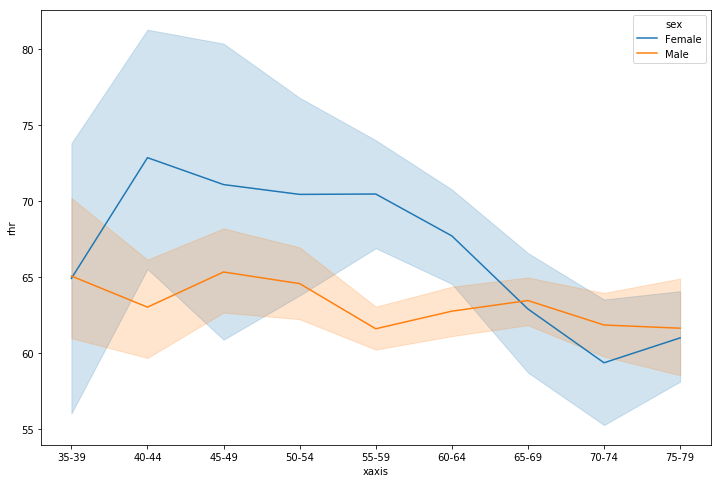

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

labels = sorted(np.unique(df.age_group))
df['xaxis'] = df.age_group.map(lambda x: labels.index(x)).astype('float')
plt.figure(figsize=(12, 8))
sns.lineplot(x='xaxis', y='rhr', hue='sex', data=df)
plt.xticks(np.arange(len(labels)), labels)

### Clinical Conclusion
Answer the following prompts to draw a conclusion about the data.
> 1. For women, we see .... 
> 2. For men, we see ... 
> 3. In comparison to men, women's heart rate is .... 
> 4. What are some possible reasons for what we see in our data?
> 5. What else can we do or go and find to figure out what is really happening? How would that improve the results?
> 6. Did we validate the trend that average resting heart rate increases up until middle age and then decreases into old age? How?

Your write-up will go here...

### Write-Up

1. **For women, we see ...**

    - For women, we see the expected trend, where average resting heart rate increases up until middle age, then decreases into old age.
    

2. **For men, we see ...**

    - For men, we do not see the expected trend, at least for the 35-79 year-old segments. In fact, resting heart rate appears to be dropping throughout this age range.
    

3. **In comparison to men, women's heart rate is ...**

    - Women's heart rate is generally higher than it is for men until the late 60s. 
    - It demonstrates the expected trend in heart rate, while men do not. 
    - In addition, women's heart rate is is much more variable. While men's heart rates cluster close to the mean within the 95% confidence interval, women's heart rates show a large variation, especially for the 35-54 year-old age range. 
    

4. **What are some possible reasons for what we see in our data**?

    - Women may have higher heart rates because of physiological reasons, perhaps because their hearts are smaller, on average, compared to the volume of blood that must be pumped. Therefore they must pump more frequently. 
    - The lack of expected trend in our data for men might be due to a high level of fitness with respect to the general population. It could also be that heart rate peaks earlier for men than age 35. 
    - The greater variation in our data for women may be due to smaller sample size. There may be a lot more men in the sample than women, so the 95th confidence interval appears wider. Another reason might be that the variation in health of the women was much greater than the variation in health conditions for men in the sample.


5. **What else can we do or go and find to figure out what is really happening? How would that improve the results?**

    - To figure out what is really happening, we could try to identify the level of fitness based on subject data. We can also conduct additional exploratory data analyses, determining the number of women versus the number of men, and the ratio of women to men at every age grouping. 
    - Based on our findings from this research and anlaysis, we could try to improve the results by enlarging the dataset to include a wider variation of fitness levels for men, and a larger number of subjects who are women.
    

6. **Did we validate the trend that average resting heart rate increases up until middle age and then decreases into old age? How?**

    - We validated the trend that average resting heart rate increases up until middle age and then decreases into old age for women.
    - However, we could not validate this trend for men. We only see that the heart rate decreases over time from age 35 to age 79.